# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

You work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided you with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which you will clean, combine and analyze to create a report on the state of climate change in Africa. You will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.

In [1]:
# Create a directory if it is not there, so we can save files and results in it
from pathlib import Path
Path('/kaggle/working/images').mkdir(parents=True, exist_ok=True)
Path('/kaggle/working/data').mkdir(parents=True, exist_ok=True)

In [2]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.3 MB/s eta 0:00:00
  Obtaining dependency information for pandas-flavor>=0.2.0 from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=6008f746cc430992b3309641b4509c2a7382c4ad8b3991a856b72a5ab286d720
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('/kaggle/input/climate-change-data/IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('/kaggle/input/climate-change-data/temperatures.csv')

## Instruction 1: Clean and tidy the datasets

### Tasks

- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.

### Hints

- Use `df.rename()` method to rename columns.
- The `df.drop()` method can be used to drop columns.
- You might find `df.melt()` or `pd.melt()` useful.
- The `df.column.astype(int)` can be used to convert to a column to an integer type.

In [4]:
# Your code here (for the learner)
# Rename columns
ipcc_2006_africa = ipcc_2006_africa.rename(columns={'C_group_IM24_sh': 'Region', 'Country_code_A3': 'Code', 'ipcc_code_2006_for_standard_report_name': 'Industry'})   
totals_by_country_africa = totals_by_country_africa.rename(columns={'C_group_IM24_sh': 'Region', 'Country_code_A3': 'Code'})

# Drop columns
ipcc_2006_africa = ipcc_2006_africa.drop(['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'], axis=1)
totals_by_country_africa = totals_by_country_africa.drop(['IPCC_annex', 'Substance'], axis=1)

# Melt and clean Year column

def melt_clean(df):
    value_vars = list(filter(lambda x: x.startswith('Y_'), df.columns))
    id_vars = list(set(df.columns).difference(value_vars))

    # melt
    long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='CO2')

    # drop rows where co2 is missing
    long = long[~long.CO2.isnull()]

    # convert year to integer
    long.Year = long.Year.str.replace('Y_', '').astype(int)

    return long

ipcc_2006_africa = melt_clean(ipcc_2006_africa)
totals_by_country_africa = melt_clean(totals_by_country_africa)


## Instruction 2: Show the trend of `CO2` levels across the African regions

### Tasks

- Using `totals_by_country_africa`, create a line plot of `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year.

### Hints

- Use `sns.lineplot()` to create a line plot.
- Your plot should be similar to the one shown below.

![co2_vs_year](co2_year.png)

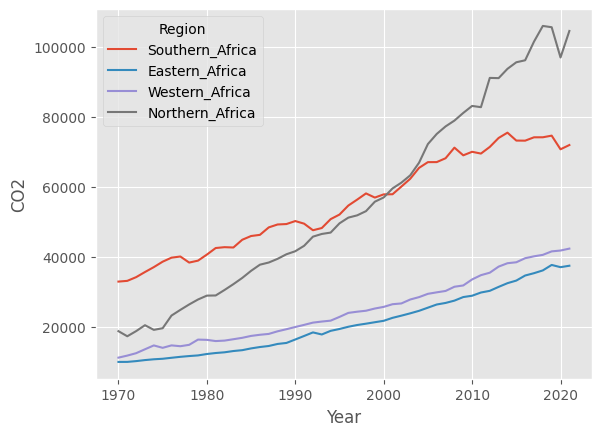

In [5]:
# Your code here
sns.lineplot(data=totals_by_country_africa, x='Year', y='CO2', hue='Region', errorbar=None)
plt.show()

## Instruction 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions


### Tasks

- Using the `totals_by_country_africa` dataset, conduct a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Save the results in a variable called `relationship_btw_time_CO2`.


### Hints
- Use `df.groupby()` and `df.corr()` methods. 
- Use the `corr()` method's `method` parameter to set the correlation type.

In [6]:
# Your code here

#relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region').corr(method='spearman')
#display(relationship_btw_time_CO2)


## Instruction 4: Determine if there is a significant difference in the CO2 levels among the African Regions

### Tasks

- Using `totals_by_country_africa`, conduct an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. Save the results as `aov_results`.
- Conduct a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. Save the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide you with the answer.

In [7]:
# Your code here
aov_results = pingouin.anova(data=totals_by_country_africa, dv='CO2', between='Region')
pw_ttest_result = pingouin.pairwise_tests(data = totals_by_country_africa, dv='CO2', between='Region', padjust='bonf')
#print(pw_ttest_result)

## Instruction 5: Determine the most common (top 5) industries in each African region.

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Count the occurrences of each `Industry` within each `Region` and name it `Count`.
- Sort the data within each region group by `Count` in descending order
- Get the top 5 industries for each region
- save it to variable `top_5_industries` for each region.

### Hints

- You can use the `df.groupby()` method to group the data by multiple columns.
- The `df.value_counts()` function can be useful for counting occurrences.
- The `df.sort_values` function can help you with sorting.

In [8]:
# Your code here
grouped = ipcc_2006_africa.groupby(['Region', 'Industry']).size().reset_index(name='Count')
grouped = grouped.sort_values(['Region', 'Count'], ascending=[True, False])
top_5_industries = grouped.groupby('Region').head(5).reset_index(drop=True)
#print(top_5_industries)

## Instruction 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Calculate the average `CO2` emissions for each group.
- Find the `Industry` with the maximum average `CO2` emissions in each region.

### Hints
- You can use the `df.groupby()` method to group the data by `Region` and `Industry`.
- The `df.mean()` function can be used to calculate the average CO2 emissions for each group.
- The `df.idxmax()` function can help you find the index of the row with the maximum average CO2 emissions within each region group.
- You can use the `df.loc[]` method to select the rows corresponding to the indices found in step 3.

In [9]:
# Your code here
group = ipcc_2006_africa.groupby(['Region', 'Industry'])[
        'CO2'].mean().reset_index()
max_co2_industries = group.loc[group.groupby(
        'Region')['CO2'].idxmax()].reset_index(drop=True)
#print(max_co2_industries)

## Instruction 7: Predict the `CO2` levels (at each African region) in the year 2025

### Tasks

- Create an instance of `LinearRegression()` and save it as `reg`.
- Fit a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predict the values of `CO2` using the `reg.predict()` and the data provided. Save the result as `predicted_co2`. 
- Convert `predicted_co2` values from log base 10 to decimals and round to 2 d.p using `np.round()`.


### Hints

- Use `pd.get_dummies()` on the features to one-hot-encode the `Region` column before fitting the model.
- If `Y = np.log10(X)`, then `X = 10**Y`.

In [10]:
# Your code here
# data provided for you
reg = LinearRegression()
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)
target = np.log10(totals_by_country_africa['CO2'])
feats = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])
reg.fit(feats, target)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10**predicted_co2, 2)
#print(predicted_co2)

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries

![relationship between co2 and temp](co2_temp.png)


### Tasks

- Select `Name`, `Year` and `CO2` of countries `countries`. Save the result as `selected_countries`.
- Convert `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Save the result as `temp_long`.
- Perform an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Save the result as `joined`.
- Create a linear model of `Temperature` by `CO2` and `Name`. Save the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature? Run `model_temp.summary()` to find out!
- What is the adjusted R squared value of the model?

### Hints

- `df.melt()` converts a dataset from wide to long.
- `pd.merge()` can be used to perform all kinds of joins.

In [11]:
# Your code here
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

selected_countries = totals_by_country_africa[[
        'Name', 'Year', 'CO2']].query('Name in @countries')

temp_long = temperatures.melt(
        id_vars=['Year'],
        value_vars=countries,
        var_name='Name',
        value_name='Temperature')

joined = pd.merge(
        selected_countries, temp_long, on=[
            'Name', 'Year'], how='inner')

# Provided for you
# Uncomment and run to complete this task
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          1.22e-182
Time:                        20:25:59   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""